In [1]:
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='ElectricDevices'

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
train_x.shape

(8926, 96, 1)

In [6]:
train_y.shape

(8926,)

# Load Model

In [7]:

import tensorflow as tf 
model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2022-10-27 12:00:06.444278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 12:00:06.444302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 12:00:08.399890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-27 12:00:08.399925: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-27 12:00:08.399950: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacqueline-ThinkPad-P53): /proc/driver/nvidia/version does not exist
2022-10-27 12:00:08.400165: I tensorflow/core/platfor

# Explanation Algo

In [8]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [9]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST


In [10]:

leftist = LEFTIST(model_to_explain,(test_x, test_y),mode='time',backend='TF',transform_name='straight_line',learning_process_name='Lime')
#,'straight_line',segmentator,,learning_process_name

In [11]:
explanations = leftist.explain(np.array(explained_instance),1000)

32/32 [==============================] - 0s 3ms/step


In [12]:
explanations

[array([-0.0091955 , -0.0091955 , -0.0091955 , -0.0091955 , -0.0091955 ,
        -0.0091955 , -0.0091955 , -0.0091955 , -0.0091955 , -0.00288324,
        -0.00288324, -0.00288324, -0.00288324, -0.00288324, -0.00288324,
        -0.00288324, -0.00288324, -0.00288324, -0.00225188, -0.00225188,
        -0.00225188, -0.00225188, -0.00225188, -0.00225188, -0.00225188,
        -0.00225188, -0.00225188,  0.00470509,  0.00470509,  0.00470509,
         0.00470509,  0.00470509,  0.00470509,  0.00470509,  0.00470509,
         0.00470509,  0.00487604,  0.00487604,  0.00487604,  0.00487604,
         0.00487604,  0.00487604,  0.00487604,  0.00487604,  0.00487604,
         0.00599548,  0.00599548,  0.00599548,  0.00599548,  0.00599548,
         0.00599548,  0.00599548,  0.00599548,  0.00599548,  0.00875698,
         0.00875698,  0.00875698,  0.00875698,  0.00875698,  0.00875698,
         0.00875698,  0.00875698,  0.00875698,  0.01495883,  0.01495883,
         0.01495883,  0.01495883,  0.01495883,  0.0

time mode
(1, 96)
(1, 96)
-1
1
0


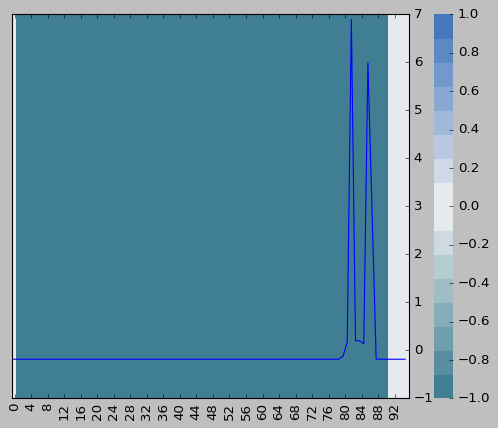

In [13]:
leftist.plot(np.array([explained_instance]), np.array([explanations[1]]))